<a href="https://colab.research.google.com/github/racoonjonny/Tensorflow_study/blob/main/3_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 목적 : Keras를 이용하여 Linear regression 문제를 해결해 보자.
# 모델 : w1x1 + w2x2 + w3x3 + b = y
# 정답 : 2x1 -3x2 + 2x3 + 0 

# 중점 : Linear regression 모델을 keras로 어떻게 구현하는가

In [4]:
# 라이브러리 import
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

print(tf.__version__)

2.5.0


In [5]:
# 데이터 생성
x_data = np.array([[1,2,0],[5,4,3,],[1,2,-1],[3,1,0],[2,4,2],[4,1,2],[-1,3,2],[4,3,3],[0,2,6],[2,2,1],[1,-2,-2],[0,1,3],[1,1,3],[0,1,4],[2,3,3]])

t_data = np.array([-4, 4, -6, 3, -4, 9, -7, 5, 6, 0, 4, 3, 5, 5, 1])

print('x_data.shape = ', x_data.shape, ', t_data.shape =', t_data.shape)

x_data.shape =  (15, 3) , t_data.shape = (15,)


In [7]:
# 모델 구축 
model = Sequential()

model.add(Dense(1, input_shape = (3,), activation = 'linear'))


# 모델 컴파일
model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 학습
hist = model.fit(x_data, t_data, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 516ms/step - loss: 25.3462
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 23.5333
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 22.0658
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 20.8027
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 19.6719
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 18.6356
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 17.6730
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 16.7719
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 15.9247
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 15.1260
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 14.3718
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 13.6588
Epoch 13/1000
1/1 [================

In [10]:
# 모델 평가 및 예측
test_data = [[5,5,0],[2,3,1],[-1,0,1],[10,5,2],[4,-1,-2]]

ret_val = [2*data[0] -3*data[1] + 2*data[2] + 0 for data in test_data]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('-----------')
print(ret_val)

# 거의 정답과 같은 값을 예측하는 것을 확인할 수 있다.


[[-4.9996219e+00]
 [-3.0001097e+00]
 [-7.8884308e-04]
 [ 9.0010910e+00]
 [ 6.9994254e+00]]
-----------
[-5, -3, 0, 9, 7]


In [11]:
# 모델 가중치, 바이어스 확인
print(model.input) # 모델 입력
print(model.output) # 모델 출력
print(model.weights) # 모델 가중치

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.0001118],
       [-2.9998853],
       [ 2.0000768]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.0007538], dtype=float32)>]


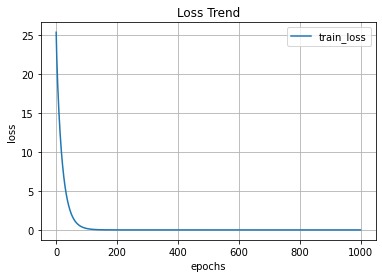

In [12]:
# 모델 손실함수 추세 확인 (error값 추세)
import matplotlib.pyplot as plt
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train_loss')
plt.legend(loc = 'best')

plt.show()